### Import libraries

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

from scipy.spatial import ConvexHull

from bimpy import bSimpleStack # this is bob's code


### Specify path to .tif file and load the corresponding .xml file

In [2]:
path = '/Users/cudmore/box/data/nathan/vesselucida/20191017__0001.tif'

bss = bSimpleStack.bSimpleStack(path, loadImages=False)


loadVesselucida_xml() file /Users/cudmore/box/data/nathan/vesselucida/20191017__0001.xml
   loaded 87 nodes, 181 edges, and approximately 4337 points


### Extract the points in the tracing and plot them

<IPython.core.display.Javascript object>


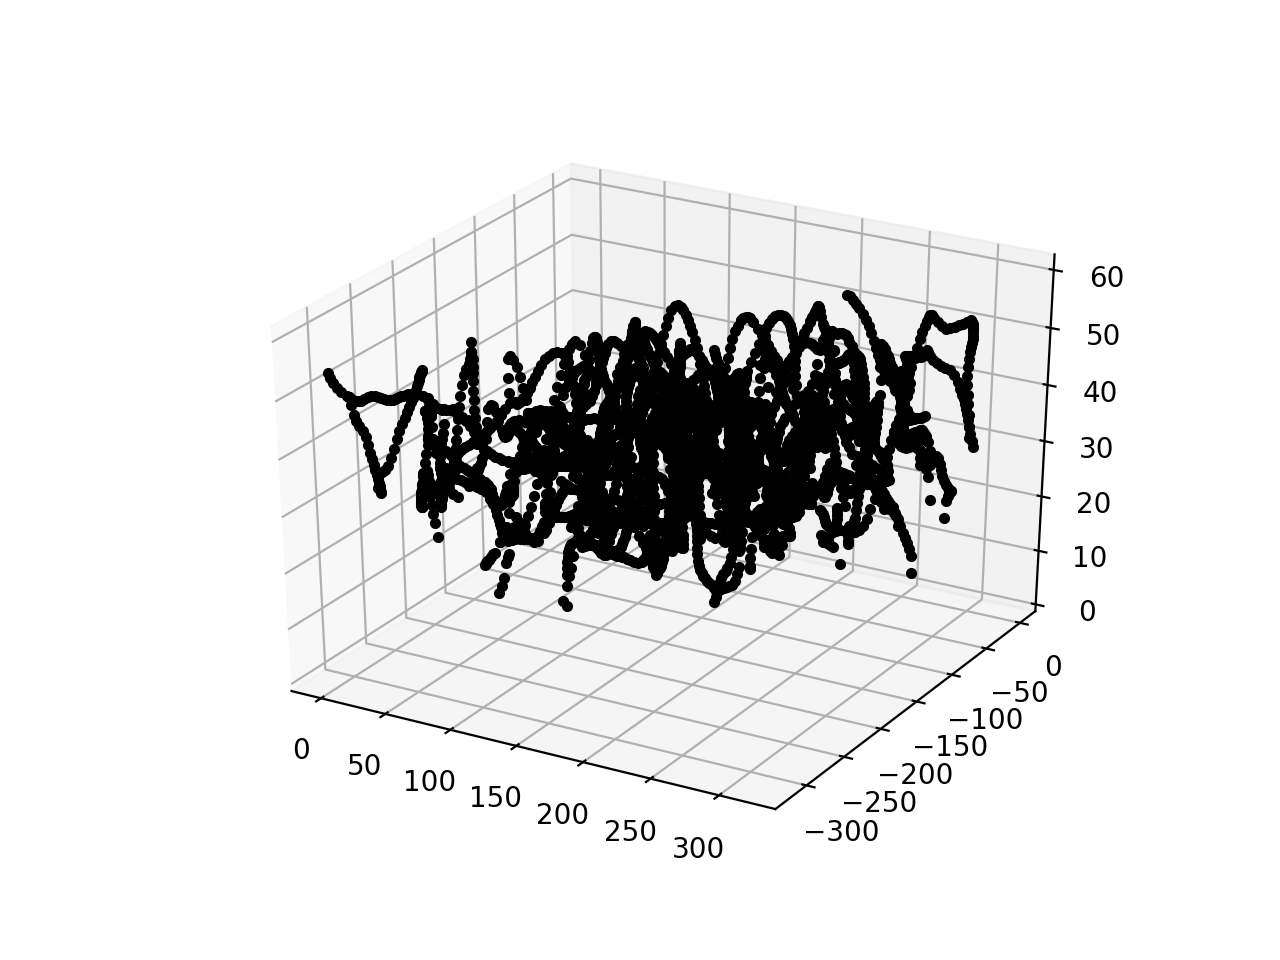

In [3]:

points = bss.slabMatrix_original()

x = points[:,0]
y = points[:,1]
z = points[:,2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x,y,z, '.k')


### Calculate convex hull and get its volume

In [4]:
points = bss.slabMatrix_original()
points = points[~np.isnan(points).any(axis=1)] # remove nan rows

#see: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html
hull = ConvexHull(points)

print('Volume of convex hull is', hull.volume, 'um^3')

Volume of convex hull is 3707760.7745726677 um^3


### Plot the 3d tracing with the convex hull

loadVesselucida_xml() file /Users/cudmore/box/data/nathan/vesselucida/20191017__0001.xml
   loaded 87 nodes, 181 edges, and approximately 4337 points
Volume of convex hull is 3707760.7745726677 um^3
total tracing length 21696.73


<IPython.core.display.Javascript object>


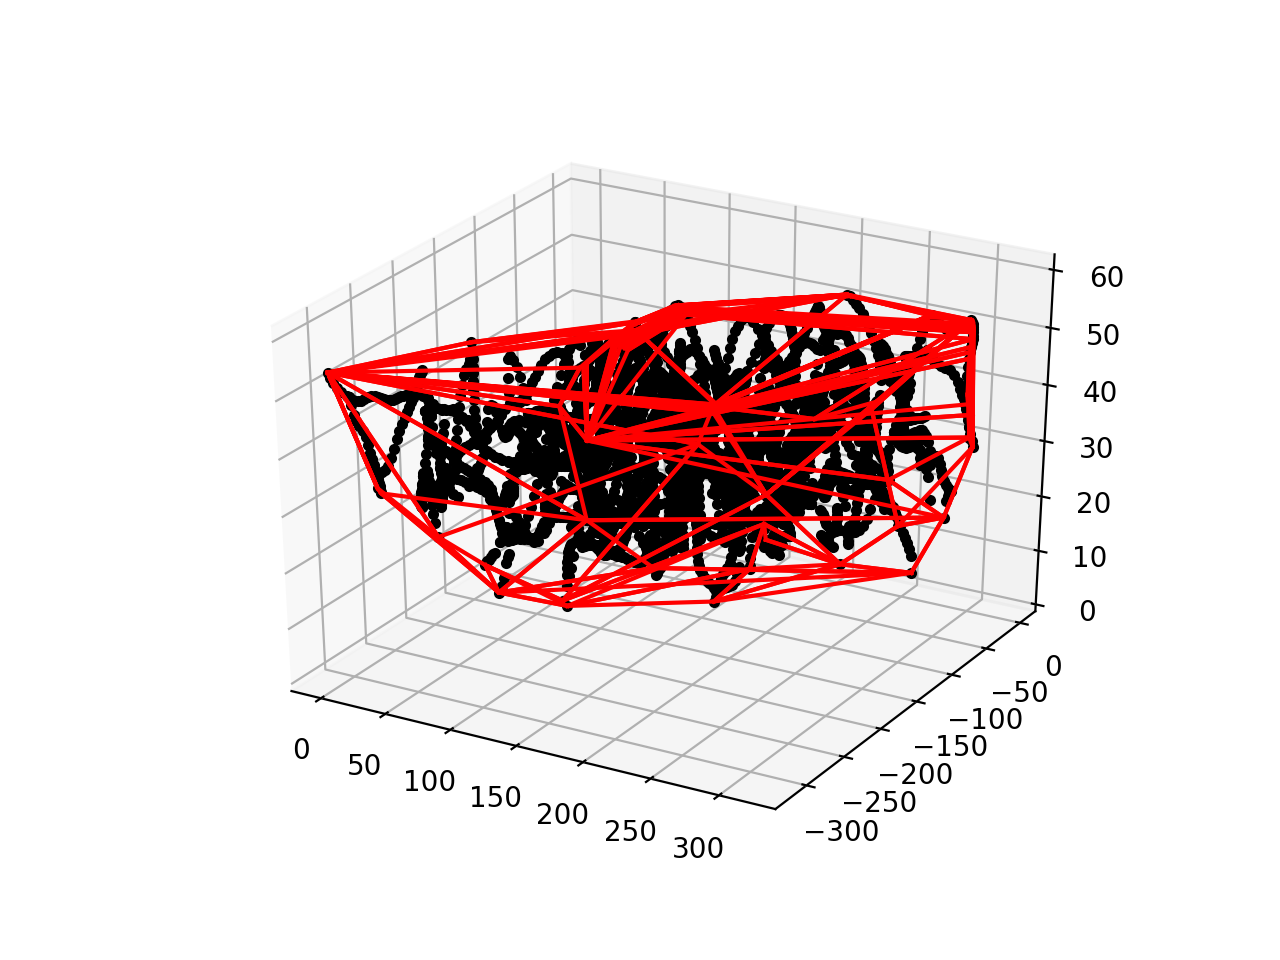

In [8]:
path = '/Users/cudmore/box/data/nathan/vesselucida/20191017__0001.tif'

bss = bSimpleStack.bSimpleStack(path, loadImages=False)
points = bss.slabMatrix_original()

points = points[~np.isnan(points).any(axis=1)] # remove nan rows

hull = ConvexHull(points)
print('Volume of convex hull is', hull.volume, 'um^3')

# get total length of tracing
totalTracingLength = 0
for edge in bss.slabList.edgeDictList:
    totalTracingLength += edge['Len 3D Nathan']
print('total tracing length', round(totalTracingLength,2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x,y,z, '.k')
for simplex in hull.simplices:
    ax.plot(points[simplex, 0], points[simplex, 1], points[simplex, 2], 'r-')